In [1]:
import numpy as np
import pandas as pd
import sklearn, sklearn.model_selection, sklearn.neighbors, sklearn.svm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
wine = data.frame
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data.data, data.target, random_state = 42)

# 1. Многоклассовая классификация

## 1. Прямая оценка accuracy

In [3]:
from sklearn.metrics import accuracy_score

model = sklearn.svm.SVC()
model.fit(X_train,y_train)
model_preds = model.predict(X_test)
accuracy_score(y_test, model_preds)

0.7111111111111111

## 2. Оценка с кросс-валидацией

In [4]:
cvgen = sklearn.model_selection.StratifiedKFold(5)
scores = sklearn.model_selection.cross_val_score(model, data.data, data.target, cv = cvgen)

list(scores), scores.mean()

([0.6388888888888888,
  0.6111111111111112,
  0.6388888888888888,
  0.6857142857142857,
  0.7428571428571429],
 0.6634920634920635)

## 3. Настройка гиперпараметров

In [5]:
params = {  
    'C': [ 1, 3, 5, 10, 30, 50, 100, 300, 500, 1000],
}

In [6]:
gs = sklearn.model_selection.GridSearchCV(model, params, scoring='accuracy', verbose=1)
gs.fit(data.data, data.target)
print(gs.best_score_, gs.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8934920634920636 {'C': 1000}


In [7]:
gs.cv_results_

{'mean_fit_time': array([0.00259829, 0.00220084, 0.00179996, 0.00180149, 0.00199986,
        0.00200043, 0.00199389, 0.00220313, 0.00258574, 0.00219207]),
 'std_fit_time': array([7.98286287e-04, 4.01020844e-04, 4.00020127e-04, 4.00791659e-04,
        1.48510089e-06, 1.07261866e-06, 1.55773292e-05, 4.05241528e-04,
        8.04866272e-04, 4.13170810e-04]),
 'mean_score_time': array([0.00180125, 0.00159974, 0.00119991, 0.00139899, 0.00099912,
        0.00120125, 0.0012136 , 0.00140433, 0.00141315, 0.00140796]),
 'std_score_time': array([7.49925605e-04, 4.89551654e-04, 4.00567264e-04, 4.89729112e-04,
        1.40323057e-06, 4.01926168e-04, 3.93568502e-04, 5.00681432e-04,
        4.77490107e-04, 4.82070755e-04]),
 'param_C': masked_array(data=[1, 3, 5, 10, 30, 50, 100, 300, 500, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1},
  {'C': 3},
  {'C': 5},

Text(0, 0.5, 'accuracy_score')

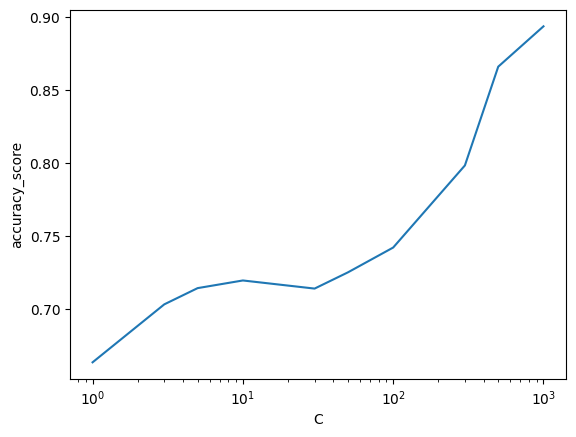

In [8]:
plt.plot(params['C'],gs.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy_score')

## 4. Confusion matrix

In [9]:
model = gs.best_estimator_.fit(X_train,y_train)
model_preds = model.predict(X_test)

<AxesSubplot: >

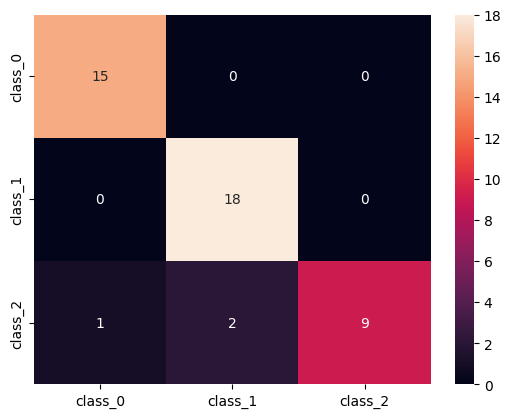

In [10]:
confusion_scores = sklearn.metrics.confusion_matrix( y_test, model_preds )
confusion_df = pd.DataFrame( confusion_scores, columns = data.target_names, index = data.target_names )
sns.heatmap( confusion_df, annot = True  )

# 2. Бинарная классификация

In [11]:
bin_data = sklearn.datasets.load_breast_cancer(as_frame=True)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = sklearn.model_selection.train_test_split(bin_data.data, bin_data.target, random_state = 42)

In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix;
def MdMetrics(predictions, y_test):
    print("Accuracy: ",accuracy_score(np.array(y_test),predictions));
    print("Precision: ",precision_score(np.array(y_test),predictions, average = 'macro',zero_division=0))
    print("Recall: ", recall_score(np.array(y_test), predictions,average = 'macro'))
    print("F1: ", f1_score(np.array(y_test), predictions,average = 'macro'))
    sns.heatmap(confusion_matrix(np.array(y_test),predictions),cmap = 'viridis', annot=True)

Accuracy:  0.951048951048951
Precision:  0.9578810247503257
Recall:  0.9388264669163545
F1:  0.9468937344156189


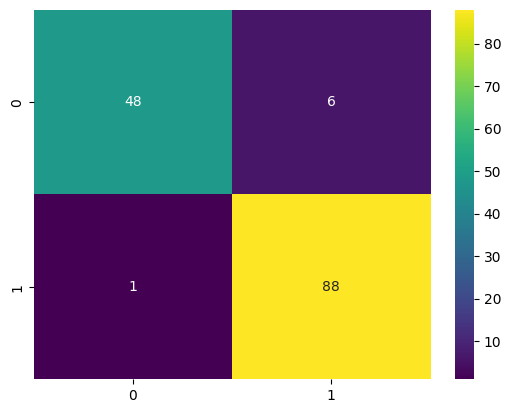

In [13]:
bin_model = sklearn.svm.SVC()
bin_model.fit(X_train_bin,y_train_bin)
bin_model_preds = bin_model.predict(X_test_bin)
MdMetrics(bin_model_preds, y_test_bin)

In [14]:
print( sklearn.metrics.classification_report(
    y_test_bin, bin_model_preds, target_names=["no risk", "cancer risk"]
) )

              precision    recall  f1-score   support

     no risk       0.98      0.89      0.93        54
 cancer risk       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



# MinMaxSacler

In [15]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(bin_data.data)
X = pd.DataFrame(scaled_features, index=bin_data.data.index, columns = bin_data.data.columns)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = sklearn.model_selection.train_test_split(X, bin_data.target ,test_size=0.3, random_state=42)

Accuracy:  0.9824561403508771
Precision:  0.9827611719443623
Recall:  0.9794973544973544
F1:  0.9810875576036866


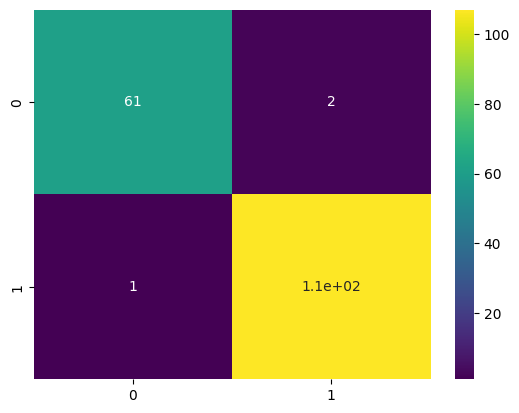

In [16]:
bin_model = sklearn.svm.SVC()
bin_model.fit(X_train_bin,y_train_bin)
bin_model_preds = bin_model.predict(X_test_bin)
MdMetrics(bin_model_preds, y_test_bin)

In [17]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(data.data)
X = pd.DataFrame(scaled_features, index=data.data.index, columns = data.data.columns)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, data.target ,test_size=0.3, random_state= 42)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


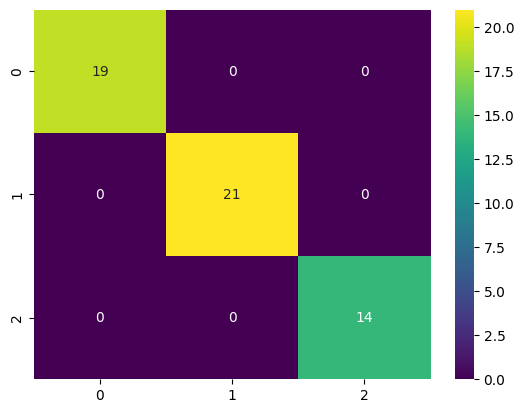

In [18]:
model = gs.best_estimator_.fit(X_train,y_train)
model_preds = model.predict(X_test)
MdMetrics(model_preds, y_test)